In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# ## Raw preprocessing
# results = pd.read_csv("results/eval_mmlu-13b_chat-ct-oe.csv")
# results = results.rename(columns={'fuzzy_gpt-3.5-turbo-1106_acc': 'acc',
#  'fuzzy_gpt-3.5-turbo-1106_unc_acc': 'unc_acc',
#  'fuzzy_gpt-3.5-turbo-1106_unc_ece': 'ece'})
# results.loc[results.query_peft_dir.isna(), "method"] = "base"
# results.loc[~results.query_peft_dir.isna(), "method"] = "ct"
# results.to_csv("results/eval_mmlu-13b_chat-ct-oe.csv", index=False)

In [8]:
results

,acc,unc_acc,ece,N,split,seed,model_name,model_dir,peft_dir,query_peft_dir,eval_kshot,prompt_style,mode,log_dir,dataset,ts,method
0,0.312500,0.312500,0.341289,16,validation,137,llama2_13b_chat,NaN,NaN,NaN,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:electrical_engineering,909.747252,base
1,0.262069,0.406897,0.231684,145,test,137,llama2_13b_chat,NaN,NaN,NaN,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:electrical_engineering,909.747252,base
2,0.161290,0.193548,0.512855,31,validation,137,llama2_13b_chat,NaN,NaN,NaN,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:professional_accounting,759.745518,base
3,0.198582,0.326241,0.368920,282,test,137,llama2_13b_chat,NaN,NaN,NaN,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:professional_accounting,759.745518,base
4,0.391304,0.565217,0.113521,69,validation,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:professional_psychology,2834.021050,ct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.376682,0.470852,0.219006,223,test,137,llama2_13b_chat,NaN,NaN,NaN,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:human_aging,450.954727,base
216,0.514286,0.571429,0.259696,35,validation,137,llama2_13b_chat,NaN,NaN,NaN,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:prehistory,1073.575878,base
217,0.456790,0.475309,0.238552,324,test,137,llama2_13b_chat,NaN,NaN,NaN,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:prehistory,1073.575878,base
218,0.390244,0.317073,0.371022,41,validation,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,NaN,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:elementary_mathematics,2515.848037,ct


In [3]:
results = pd.read_csv("results/eval_mmlu-13b_chat-ct-oe.csv")

In [4]:
dname_map = {d: idx + 1 for idx, d in enumerate(results.dataset.unique())}

plt_results = results[results.split == "test"]
plt_results["task_idx"] = results.dataset.apply(lambda d: dname_map[d])
plt_results["ece_100"] = results["ece"] * 100.
plt_results["acc_100"] = results["acc"] * 100.
plt_results["unc_acc_100"] = results["unc_acc"] * 100.
plt_results = plt_results.sort_values("task_idx")
plt_results

/tmp/ipykernel_1394920/1789983019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_results["task_idx"] = results.dataset.apply(lambda d: dname_map[d])
/tmp/ipykernel_1394920/1789983019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_results["ece_100"] = results["ece"] * 100.
/tmp/ipykernel_1394920/1789983019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,acc,unc_acc,ece,N,split,seed,model_name,model_dir,peft_dir,query_peft_dir,...,prompt_style,mode,log_dir,dataset,ts,method,task_idx,ece_100,acc_100,unc_acc_100
1,0.262069,0.406897,0.231684,145,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:electrical_engineering,909.747252,base,1,23.168360,26.206896,40.689656
115,0.255172,0.413793,0.224388,145,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:electrical_engineering,385.602820,ct,1,22.438848,25.517240,41.379309
3,0.198582,0.326241,0.368920,282,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:professional_accounting,759.745518,base,2,36.892004,19.858155,32.624114
143,0.219858,0.347518,0.348262,282,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:professional_accounting,804.928003,ct,2,34.826173,21.985815,34.751773
101,0.370915,0.436275,0.219516,612,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:professional_psychology,2231.224948,base,3,21.951579,37.091503,43.627453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.394619,0.452915,0.237418,223,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:human_aging,442.654997,ct,53,23.741750,39.461887,45.291483
211,0.410405,0.381503,0.294141,173,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:college_medicine,973.043382,ct,54,29.414137,41.040462,38.150287
185,0.439306,0.433526,0.242540,173,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:college_medicine,1550.926403,base,54,24.254029,43.930635,43.352601
195,0.156863,0.323529,0.296102,102,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:college_physics,291.601906,ct,55,29.610151,15.686275,32.352942


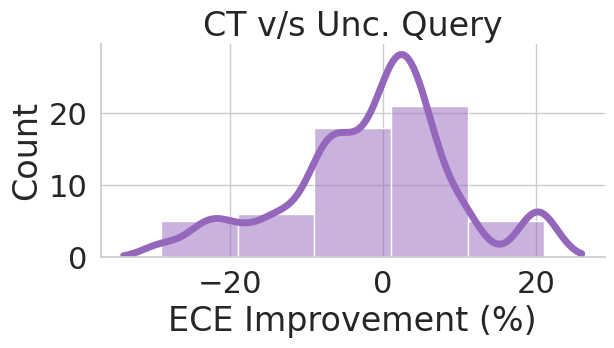

In [5]:
sns.set_theme(font_scale=2., style="whitegrid")

ref = plt_results[plt_results.method == "base"]["ece_100"].values
new = plt_results[plt_results.method == "ct"]["ece_100"].values

g = sns.displot(pd.DataFrame({ "rel_imp": -((new - ref) / ref) * 100. }),
                # kind="kde", fill=True, bw_adjust=.5,
                kde=True, stat="count", kde_kws={"bw_adjust": .5, "cut": 2}, binwidth=10,
                height=4, aspect=5/3, legend=False,
                palette=sns.color_palette("tab20")[8:9])

g.ax.get_lines()[0].set(linewidth=5)

g.set(xlabel="ECE Improvement (%)", title="CT v/s Unc. Query")

g.fig.tight_layout()
g.fig.show()
# g.fig.savefig("mmlu_rel_imp_ct_uncq.pdf", bbox_inches="tight")

/tmp/ipykernel_1394920/2828639028.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)
/tmp/ipykernel_1394920/2828639028.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)


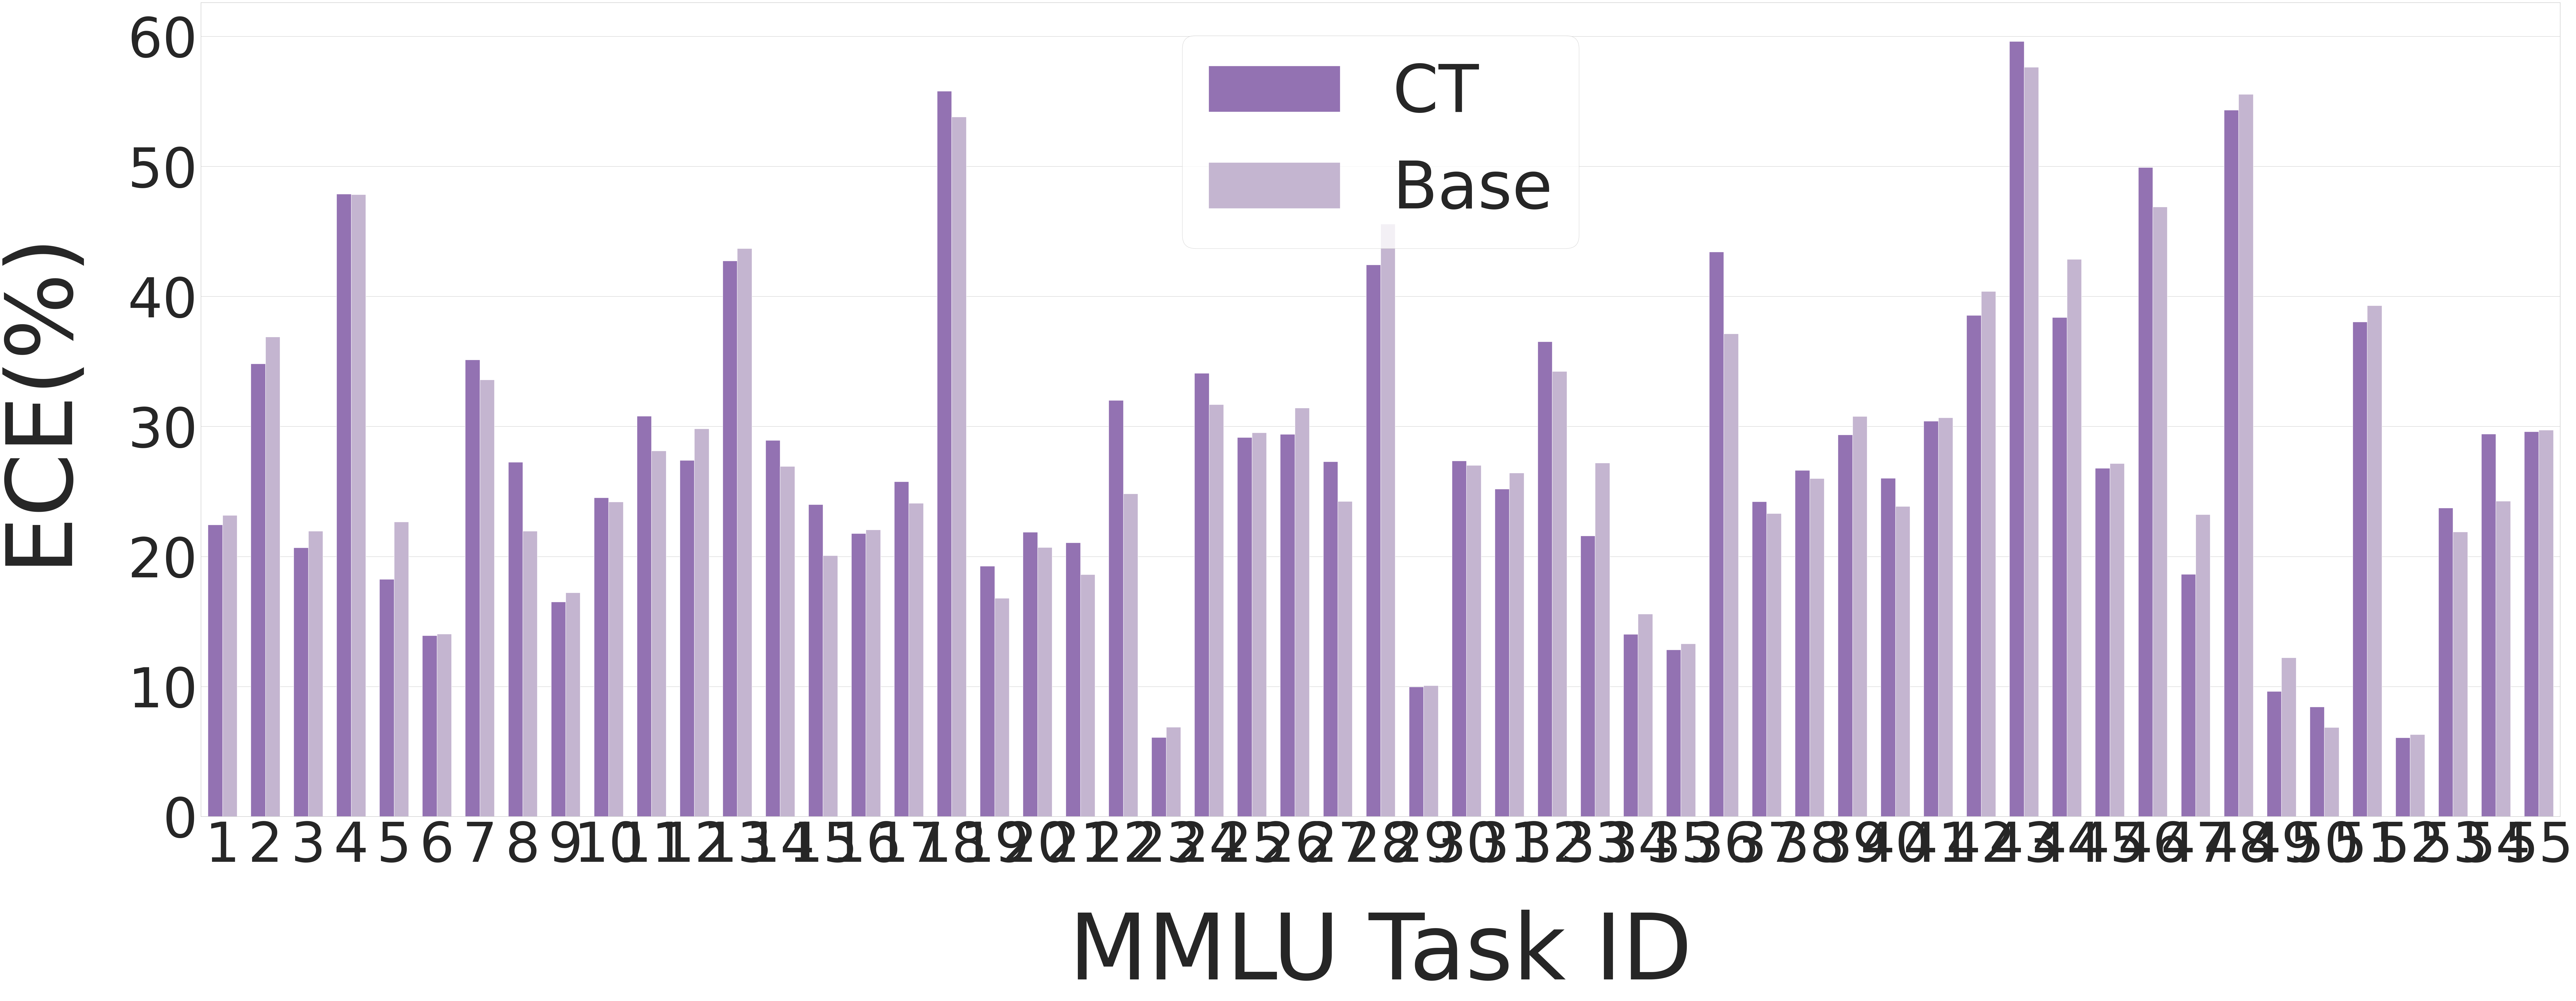

In [6]:
sns.set_theme(font_scale=6., style="whitegrid")

fig, ax = plt.subplots(figsize=(100, 40))

ax = sns.barplot(ax=ax, data=plt_results,
                 x="task_idx", y="ece_100", hue="method",
                 width=0.68,
                 hue_order=["ct", "base"],
                 palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel(r'$\mathrm{ECE} (\%)$', fontsize=250, labelpad=100)
# ax.set_yticks(np.arange(0, 60 + 1e-3, 10))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
label_map = { "base": "Base", "ct": "CT" }
labels = [label_map[l] for l in labels]

ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180))#, bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_oe_ece_comparison.pdf", bbox_inches="tight")

/tmp/ipykernel_1394920/153760189.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)


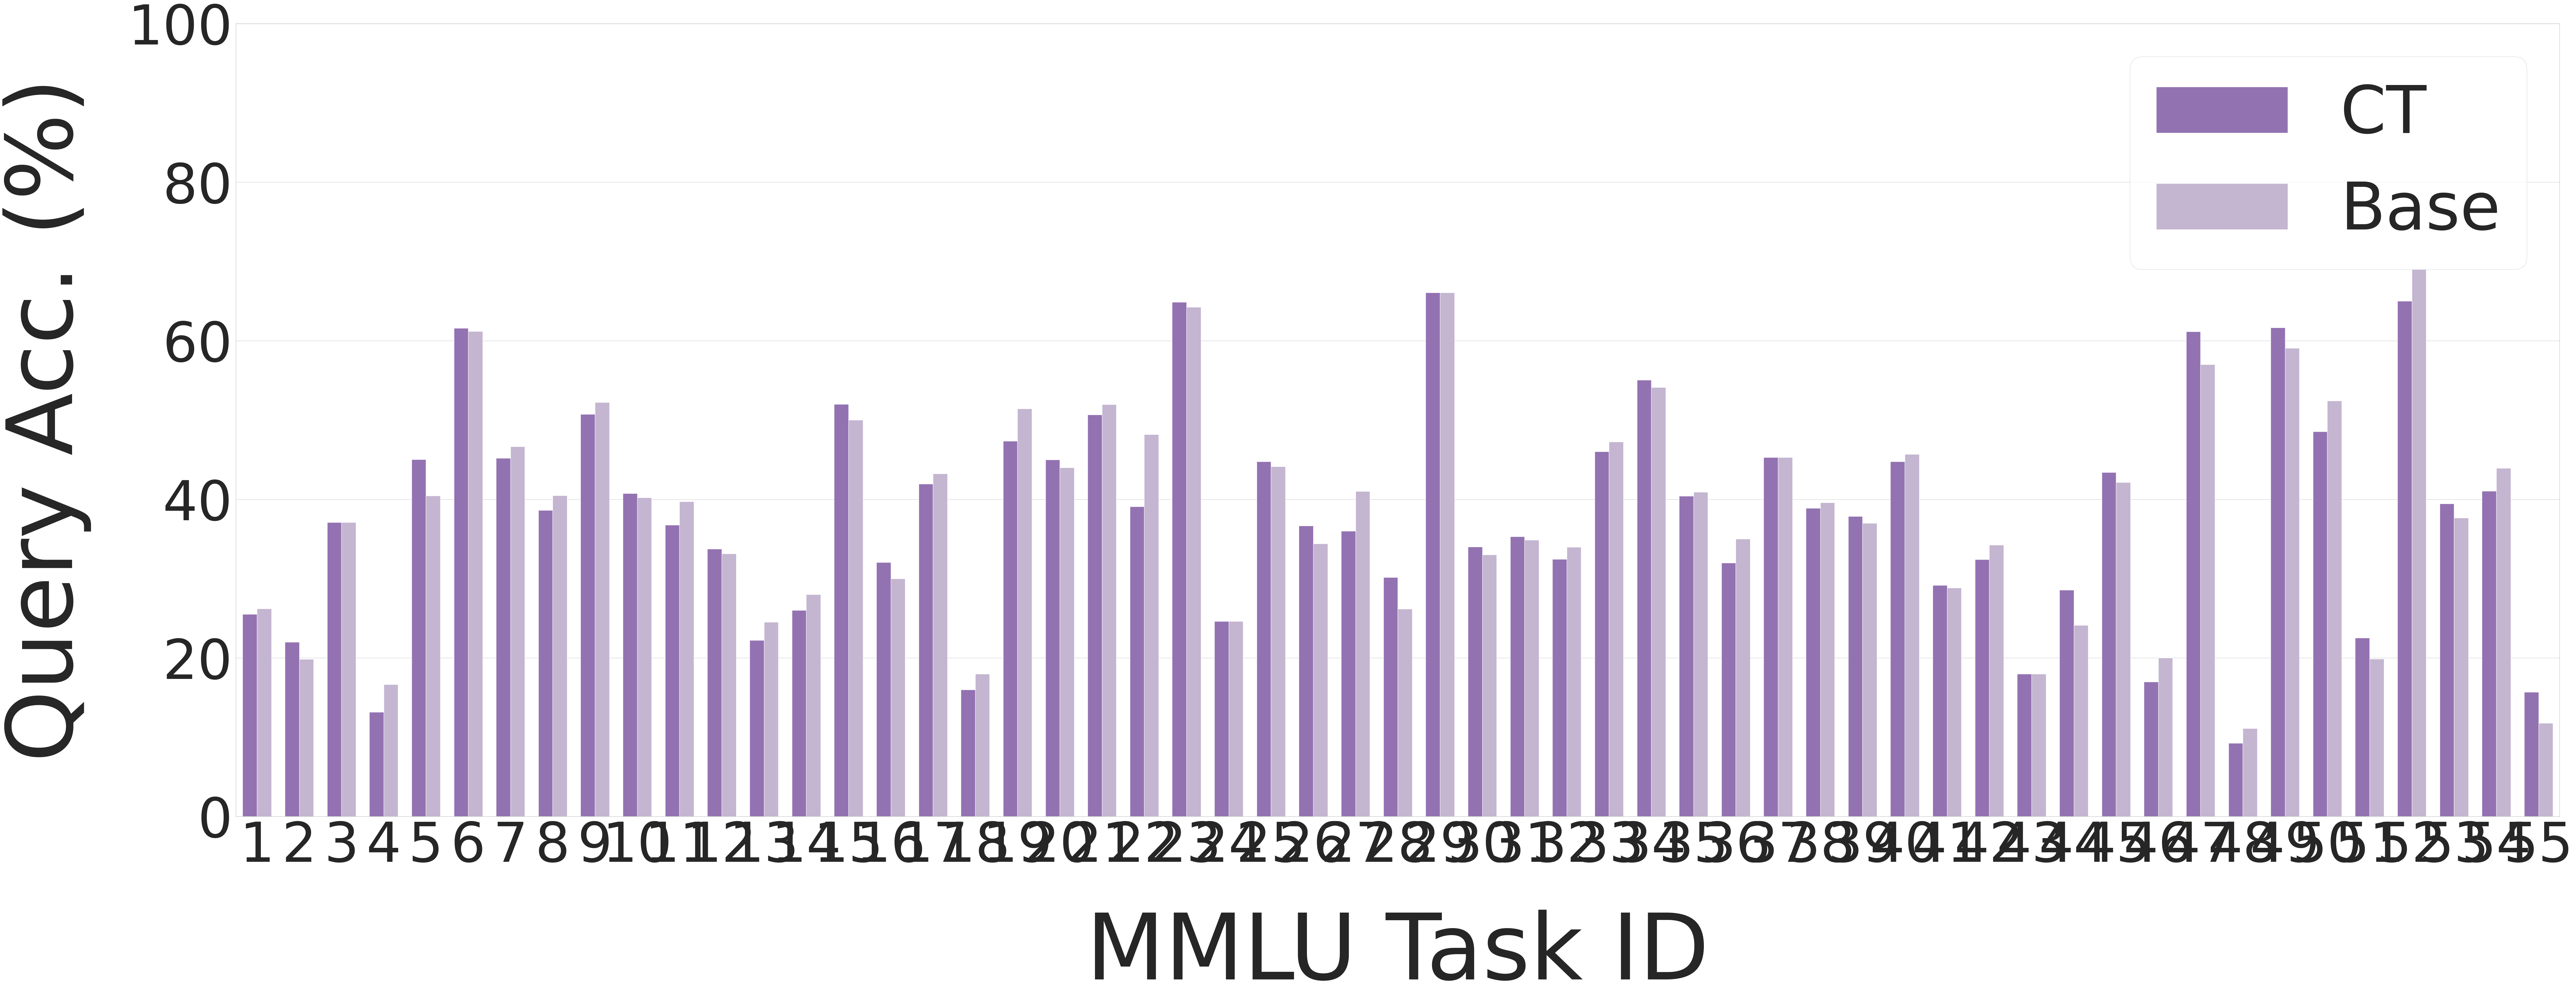

In [7]:
sns.set_theme(font_scale=6., style="whitegrid")

fig, ax = plt.subplots(figsize=(100, 40))

ax = sns.barplot(ax=ax, data=plt_results,
                 x="task_idx", y="acc_100", hue="method",
                 width=0.68,
                 hue_order=["ct", "base"],
                 palette=sns.color_palette("tab20")[8:10])

ax.set_ylabel('Query Acc. (%)', fontsize=250, labelpad=100)
ax.set_yticks(np.arange(0, 100 + 1e-3, 20))
ax.set_yticklabels(ax.get_yticklabels(), fontsize=150)

ax.set_xlabel('MMLU Task ID', fontsize=250, labelpad=100)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=150)

handles, labels = ax.get_legend_handles_labels()
label_map = { "base": "Base", "ct": "CT" }
labels = [label_map[l] for l in labels]

ax.legend(handles=handles, labels=labels, loc='best',
          title='', title_fontsize=200,
          prop=dict(size=180))#, bbox_to_anchor=(.91, .7, .1, .1))

fig.tight_layout()
fig.show()
# fig.savefig("mmlu_oe_qacc_comparison.pdf", bbox_inches="tight")